# Домашня робота №7

# Перетворення випадкових величин

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

In [ ]:
# Місце для Вашого коду
from scipy.stats import uniform

a = 1/2
def inv_func(y):
    return np.arcsin(y / a) + np.pi / 2

rv = uniform(-np.pi, 2*np.pi)
x = np.arange(0, np.pi, 0.1)

plt.hist(inv_func(rv.rvs(100000)), density=True, bins=40, rwidth=0.9)
plt.plot(x, a * np.sin(x), 'r')
plt.show()


### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

In [ ]:
# Місце для Вашого коду
from scipy.stats import norm
from random import choice

def inv_norm(y):
    t = np.sqrt(np.log(1/(2*np.pi*y**2)))
    return list(t)+list(-t)


rv = uniform(0, 1) 
random = inv_norm(rv.rvs(100000))
x = np.arange(-2, 2, 0.1)
plt.hist(random, density=True, bins=50, rwidth=0.9)
plt.plot(x, norm.pdf(x))
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

In [ ]:
# Місце для Вашого коду
from scipy.stats import geom
ksi = geom(0.5)
random = ksi.rvs(100000)
x = np.arange(0, 20, 1)

def func(x):
    res = []
    for el in x:
        if el-1 <0:
            res+=[0]
        else:
            res+=[el-1]
    return res



fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].hist(random,density=True, bins=50,rwidth=0.9)
axs[0].plot(x, ksi.pmf(x),'r')

eta_random = func(random)
axs[1].hist(eta_random,density=True, bins=50,rwidth=0.9)
axs[1].plot(x, ksi.pmf(x), 'r')

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [ ]:
# Місце для Вашого коду
from scipy.stats import expon

ksi = expon()

random = ksi.rvs(100000)
x = np.arange(0, 8, 0.1)


fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].hist(random,density=True, bins=50,rwidth=0.9)
axs[0].plot(x, ksi.pdf(x),'r')

eta = uniform(0,1)
axs[1].hist(eta.rvs(100000),density=True, bins=50,rwidth=0.9)
axs[1].plot(x, ksi.pdf(x), 'y')
axs[1].plot(x, eta.pdf(x), 'r')

plt.show()

### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [ ]:
# Місце для Вашого коду
ksi = expon()
x = np.arange(-1, 8, 0.1)
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].hist(ksi.rvs(100000),density=True, bins=200,rwidth=0.9)
axs[0].plot(x, ksi.pdf(x),'r')

eta_rvs = ksi.rvs(100000)**2
eta = lambda x: np.exp(-np.sqrt(x))/ (2*x)

axs[1].set_xlim([0,12])
axs[1].hist(eta_rvs,density=True, bins=600,rwidth=0.9)
axs[1].plot(x, ksi.pdf(x), 'r')
axs[1].plot(x, eta(x), 'y')

plt.show()


## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [ ]:
# Місце для Вашого коду
ksi = uniform(0,1)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].hist(ksi.rvs(100000),density=True, bins=200,rwidth=0.9)
axs[0].plot(x, ksi.pdf(x),'r')

eta_rvs = ksi.rvs(100000)*3 - 2
eta = lambda x: 1/3

axs[1].set_xlim([0,1])
axs[1].hist(eta_rvs,density=True, bins=200,rwidth=0.9)
axs[1].plot(x, ksi.pdf(x), 'r')
axs[1].plot(x, list(map(eta,x)), 'y')

plt.show()


### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [ ]:
# Місце для Вашого коду
ksi = uniform(0,1)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].hist(ksi.rvs(100000),density=True, bins=60,rwidth=0.9)
axs[0].plot(x, ksi.pdf(x),'r')

axs[1].hist(np.abs(ksi.rvs(100000)*2-1),density=True, bins=60,rwidth=0.9)
axs[1].plot(x, ksi.pdf(x), 'r')
axs[1].plot(np.abs(2*x - 1), rv.pdf((x + 1) / 2) + rv.pdf(-(x + 1) / 2), 'y')

plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [ ]:
# Місце для Вашого коду
ksi = uniform(0,1)
x = np.arange(0, 1, 0.01)

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].hist(ksi.rvs(100000),density=True, bins=60,rwidth=0.9)
axs[0].plot(x, ksi.pdf(x),'r')

axs[1].hist(np.abs(-np.log(ksi.rvs(100000))),density=True, bins=60,rwidth=0.9)
axs[1].plot(x, ksi.pdf(x), 'r')
axs[1].plot(-np.log(x), x * rv.pdf(np.exp(-x)), 'y')

plt.show()


## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [ ]:
# Місце для Вашого коду
ksi = (uniform(0,1), uniform(0,1))

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

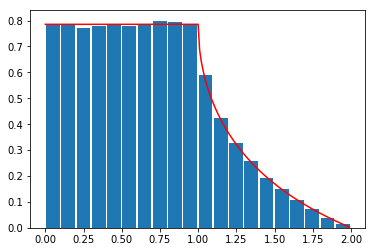

In [10]:
# Місце для Вашого коду
from scipy.stats import uniform


random = uniform(0, 1).rvs(100_000) ** 2 + uniform(0, 1).rvs(100_000) ** 2
x = np.arange(0, 2, 0.01)


def ksi_1(x):
    res = np.pi / 4 if 0 <= x <= 1 else 0
    res += (np.pi/4 - np.arccos(1 / np.sqrt(x)) + 1 / (2 * np.sqrt(x - 1))) if 1 < x <= 2 else 0
    res -= 1 / (2 * np.sqrt(x - 1)) if 1 < x <= 2 else 0
    return res

plt.hist(random, bins=20, density=True, rwidth=0.9)
plt.plot(x, list(map(ksi_1, x)), 'r')
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

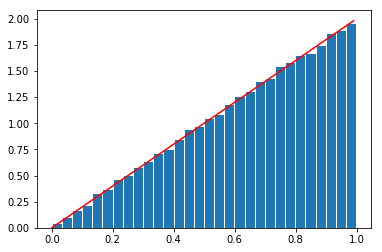

In [13]:
# Місце для Вашого коду
ksi = uniform(0,1)
random = np.array([max(a, b) for a, b in zip(ksi.rvs(100000), ksi.rvs(100000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=30, density=True, rwidth=0.9)
plt.plot(x, 2*x, 'r')
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

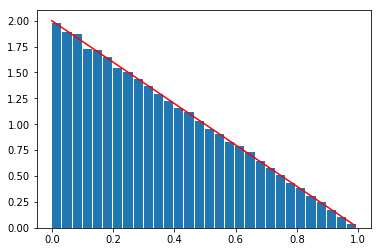

In [15]:
# Місце для Вашого коду
ksi = uniform(0,1)
random = np.array([abs(a - b) for a, b in zip(ksi.rvs(100000), ksi.rvs(100_000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=30, density=True, rwidth=0.9)
plt.plot(x, 2 - 2*x, 'r')
plt.show()
